In [1]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2 Importing the dataset
dataset = pd.read_csv('UniversalBank.csv')
print("Size of original dataset",dataset.shape)
print("")

predictors = ['Age','Experience', 'Income','Family','CCAvg','Education','Mortgage',
              'Securities Account','CD Account','Online','CreditCard']

X = dataset[predictors]
y = dataset['Personal Loan']
print("attributes for prediction\n",X)

#3 Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

#4 Feature Scaling. Only scale the X_train and X_test. It does not
#need Feature Scaling because it is a preprocessing step when 
#the algorithm is based on the Euclidean distance.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Size of original dataset (5000, 14)

attributes for prediction
       Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Securities Account  CD Account  Online  CreditCard  
0                      1           0       0    

In [2]:
#5 Fitting Decision Tree classifier to the Training set
# Create your Decision Tree classifier object here.
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier() 
classifier.fit(X_train,y_train)

#6 Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
print("")


[0 0 0 ... 0 0 0]



In [3]:
#7 Making the Confusion Matrix (How many incorrect predictions in the model)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("")

from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

avp=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(avp.head(23))

[[1791   17]
 [  31  161]]

Accuracy: 97.6 %
      Actual  Predicted
398        0          0
3833       0          0
4836       0          0
4572       0          0
636        0          0
2545       0          0
1161       1          1
2230       1          1
148        0          0
2530       0          0
4070       0          0
1261       0          0
4682       0          0
333        0          0
906        0          0
3170       0          0
483        0          0
2825       0          0
1778       0          0
2466       0          0
159        0          0
1563       0          0
402        0          1


In [4]:
sample_p = classifier.predict([(47,20,88,6,3,3,80,1,0,1,1)]) # predict new unknown

print("0 = not approved \n1 = approved")
print("personal loan prediction:",sample_p) 
                #25,1,49,4,1.6,1,0,1,0,0,0 should print out 0 (ID = 1)
                #34,9,180,1,8.9,3,0,0,0,0,0 should print out 1 (ID = 10)

0 = not approved 
1 = approved
personal loan prediction: [1]


[Text(0.6066645408163265, 0.9615384615384616, 'X[2] <= 0.87\ngini = 0.174\nsamples = 3000\nvalue = [2712, 288]'),
 Text(0.34598214285714285, 0.8846153846153846, 'X[4] <= 0.565\ngini = 0.039\nsamples = 2419\nvalue = [2371, 48]'),
 Text(0.07142857142857142, 0.8076923076923077, 'X[2] <= 0.719\ngini = 0.004\nsamples = 2235\nvalue = [2230, 5]'),
 Text(0.05102040816326531, 0.7307692307692307, 'gini = 0.0\nsamples = 2183\nvalue = [2183, 0]'),
 Text(0.09183673469387756, 0.7307692307692307, 'X[2] <= 0.762\ngini = 0.174\nsamples = 52\nvalue = [47, 5]'),
 Text(0.04081632653061224, 0.6538461538461539, 'X[4] <= -0.06\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.02040816326530612, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.061224489795918366, 0.5769230769230769, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.14285714285714285, 0.6538461538461539, 'X[8] <= 1.878\ngini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(0.10204081632653061, 0.5769230769230769, 'X

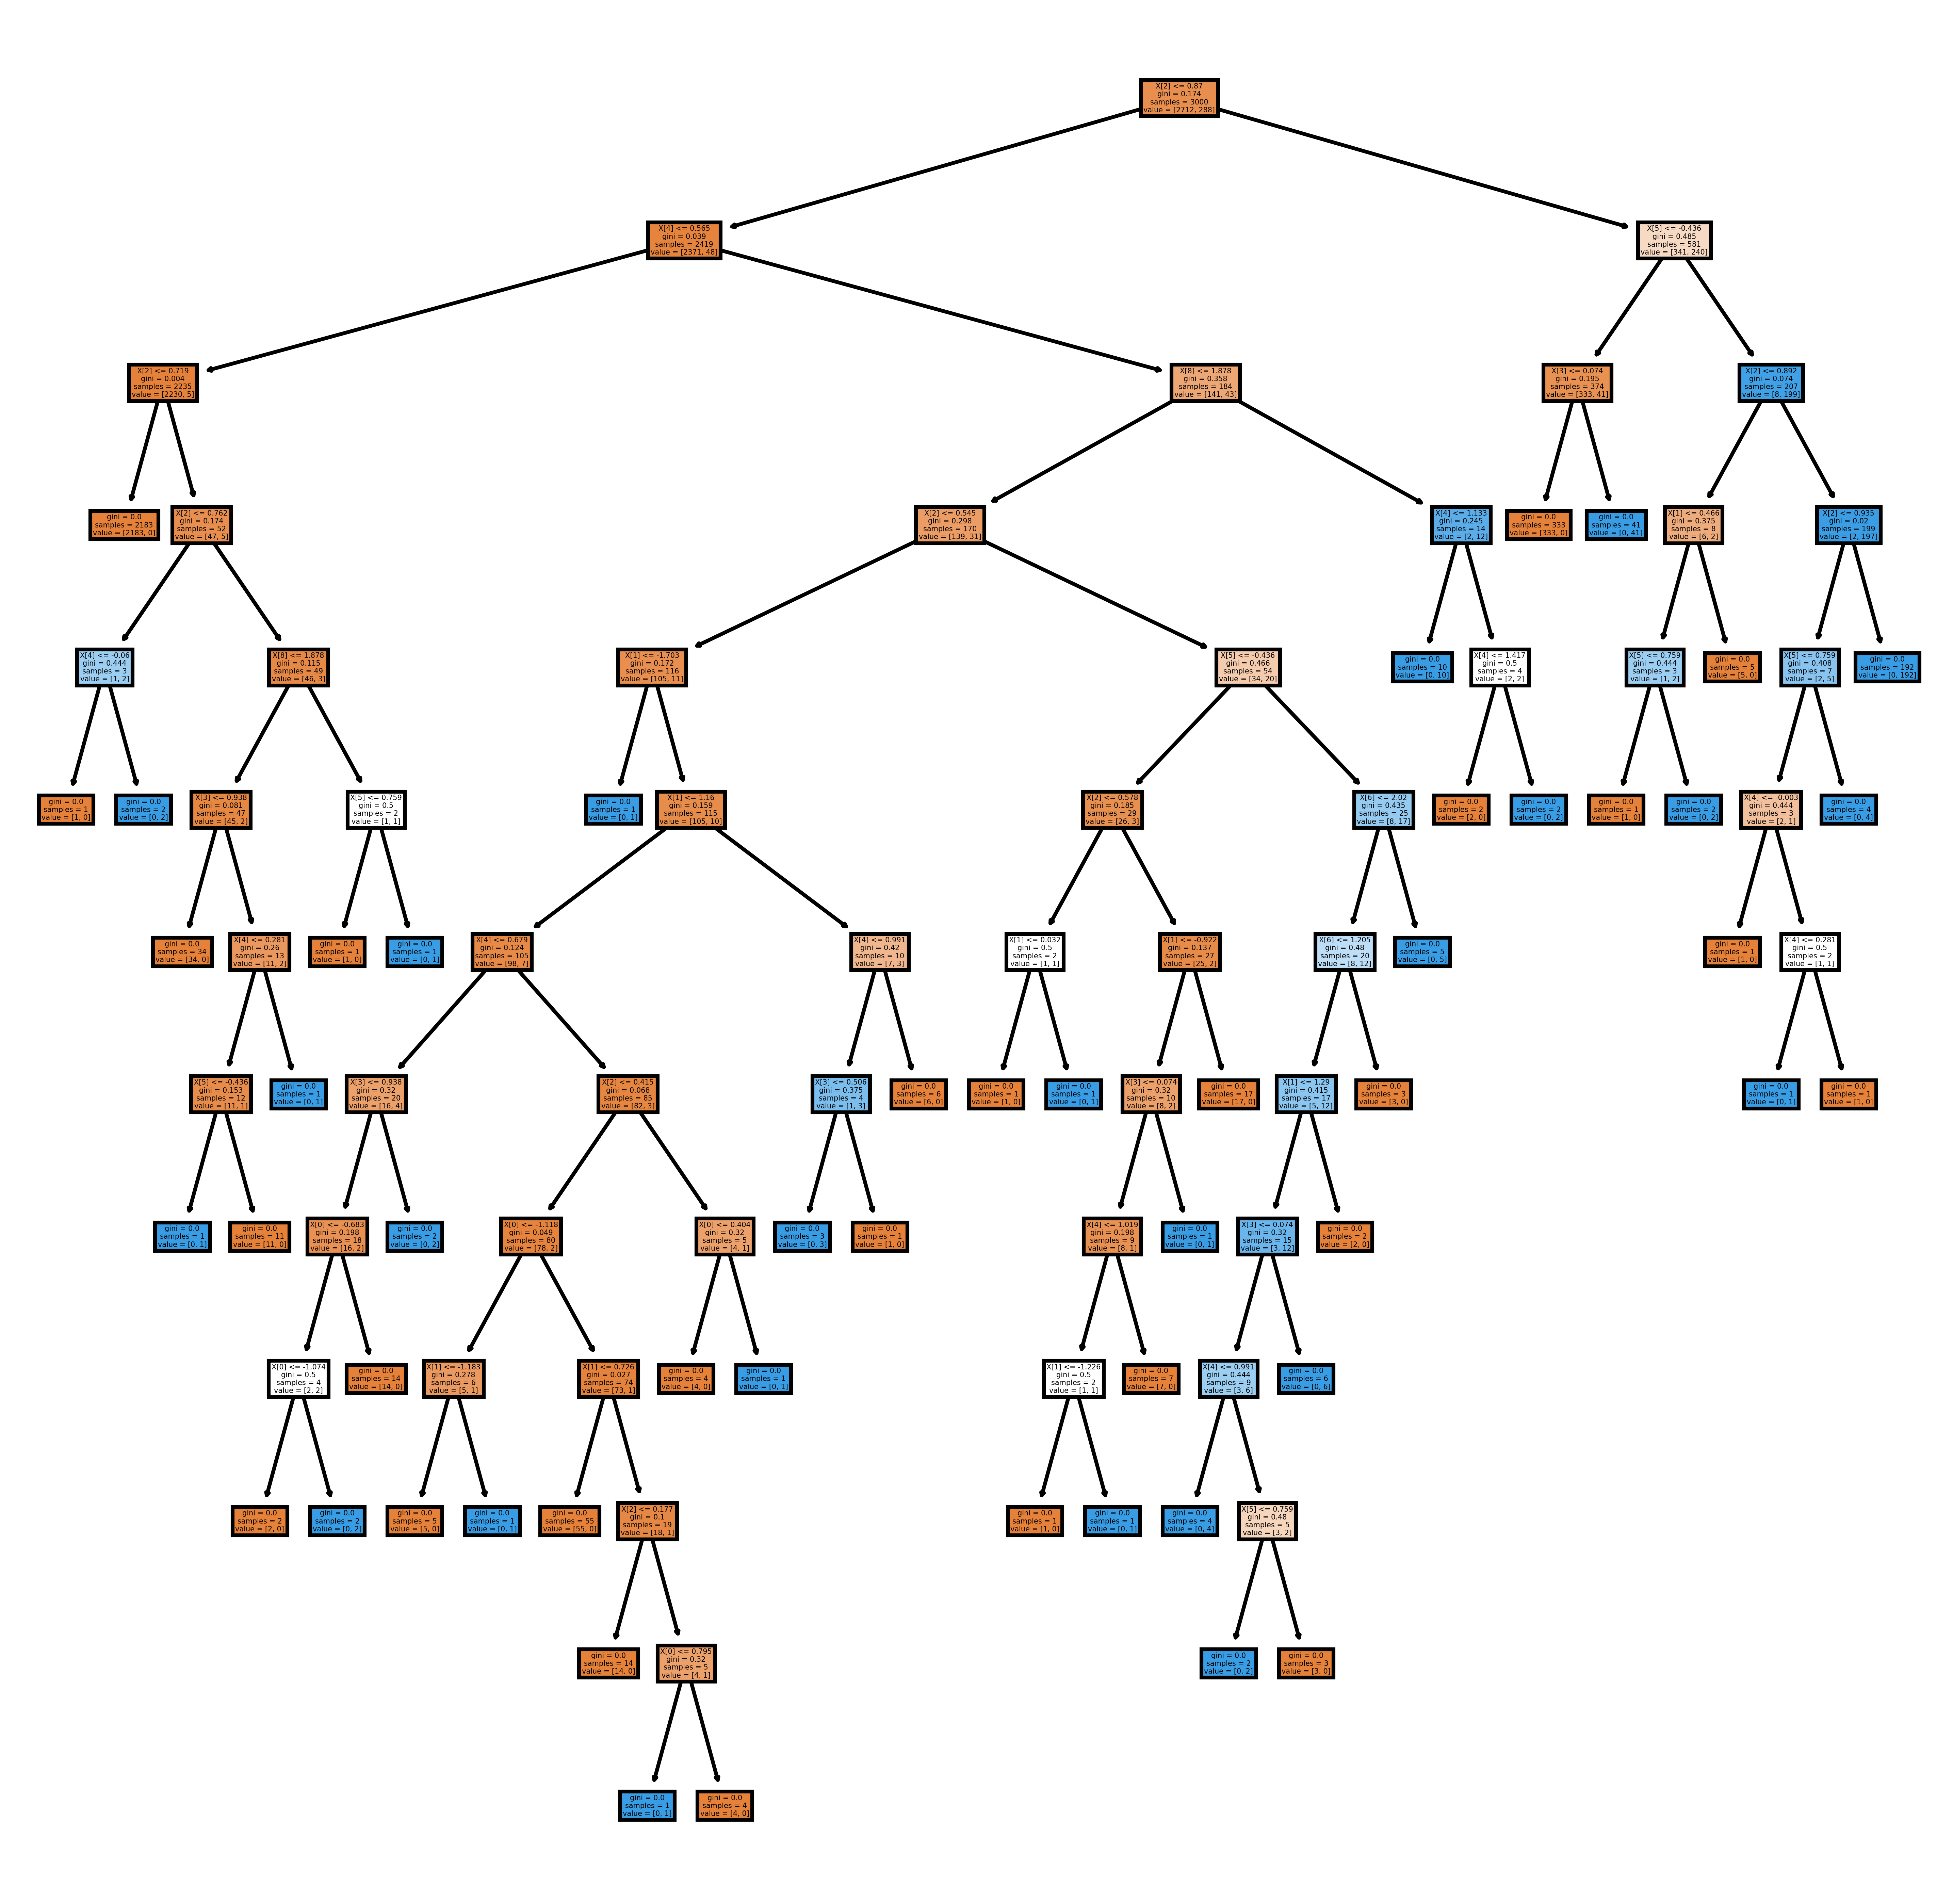

In [5]:

from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (9,9), dpi=800)
tree.plot_tree(classifier, filled=True)